<a href="https://colab.research.google.com/github/Naveenand/Computer-vision/blob/main/college_heart_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv(r"C:\Users\navee\Downloads\cardio_train.csv", sep = ';')

In [ ]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [ ]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [ ]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [ ]:
#Total cholesterol
#systolic blood pressure
#diastolic blood pressure


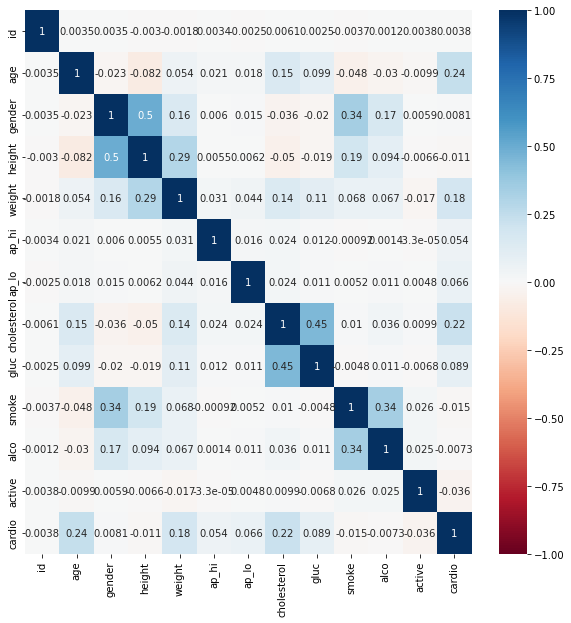

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), cmap='RdBu', vmin=-1, vmax=1, annot=True)
plt.show()

In [ ]:
duplicates = df[df.duplicated()]

In [ ]:
ds = df.drop(['id'], axis = 1)

In [ ]:
duplicates = ds[ds.duplicated()]
duplicates.count()

age            24
gender         24
height         24
weight         24
ap_hi          24
ap_lo          24
cholesterol    24
gluc           24
smoke          24
alco           24
active         24
cardio         24
dtype: int64

In [ ]:
ds = ds.drop_duplicates()

In [ ]:
df['cardio'].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

In [ ]:

target_0 = ds[ds['cardio'] == 0]
target_1 = ds[ds['cardio'] == 1]

# sample 1000 instances from each subset
target_0_sampled = target_0.sample(n=20000, random_state=42)
target_1_sampled = target_1.sample(n=20000, random_state=42)

# concatenate the subsets and shuffle the rows
cardio_data = pd.concat([target_0_sampled, target_1_sampled]).sample(frac=1, random_state=42)

In [ ]:
cardio_data

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
35166,20644,1,150,80.0,150,80,1,3,0,0,1,1
32089,22824,2,163,66.0,120,80,1,1,0,0,1,0
31460,21989,1,169,84.0,120,80,1,1,0,0,1,1
41419,21974,1,156,70.0,135,90,3,1,0,0,1,0
32218,18476,1,158,58.0,130,90,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
42008,21034,1,158,64.0,120,90,1,1,0,0,1,0
14274,23429,2,176,68.0,130,85,1,1,0,0,1,0
1878,14871,2,171,78.0,110,80,1,1,0,0,0,1
47226,20604,2,165,72.0,120,80,1,1,0,0,1,0


In [ ]:
age: age of the person (in days)
gender: 1 for women, 2 for men
height: height of the person (in cm)
weight: weight of the person (in kg)
ap_hi: systolic blood pressure (mmHg)
ap_lo: diastolic blood pressure (mmHg)
cholesterol: cholesterol level of the person (1: normal, 2: above normal, 3: well above normal)
gluc: glucose level of the person (1: normal, 2: above normal, 3: well above normal)
smoke: whether the person smokes or not (0: no, 1: yes)
alco: whether the person consumes alcohol or not (0: no, 1: yes)
active: whether the person is physically active or not (0: no, 1: yes)
cardio: whether the person has cardiovascular disease or not (0: no, 1: yes)

In [ ]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
#import graphviz

In [ ]:
x = ds.drop(['cardio'], axis= 1)
y = ds['cardio']

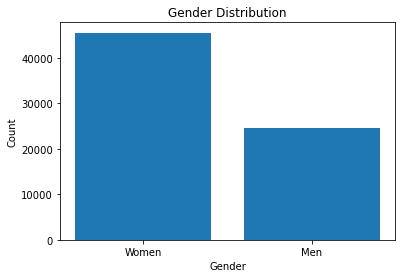

In [ ]:
gender_count = ds['gender'].value_counts()
plt.bar(['Women', 'Men'], gender_count)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

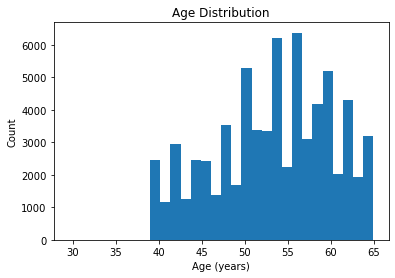

In [ ]:
plt.hist(ds['age']/365, bins=30)
plt.title('Age Distribution')
plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.show()

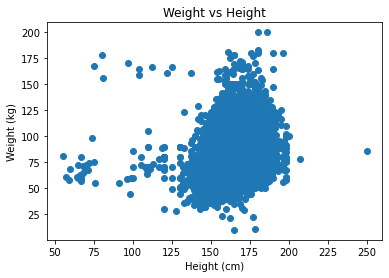

In [ ]:
plt.scatter(ds['height'], ds['weight'])
plt.title('Weight vs Height')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

<AxesSubplot:xlabel='cardio', ylabel='count'>

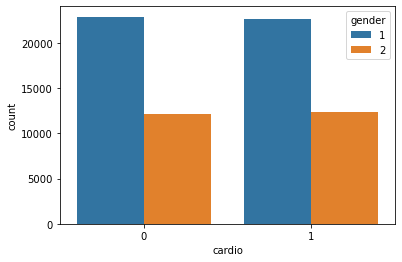

In [ ]:

sns.countplot(x='cardio', hue='gender', data=ds)

<AxesSubplot:xlabel='ap_hi', ylabel='ap_lo'>

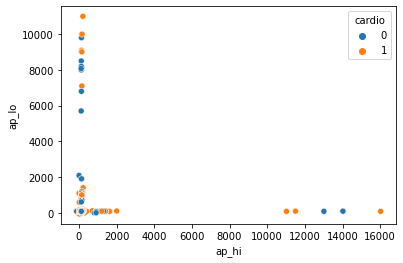

In [ ]:
sns.scatterplot(x='ap_hi', y='ap_lo', hue='cardio', data=ds)

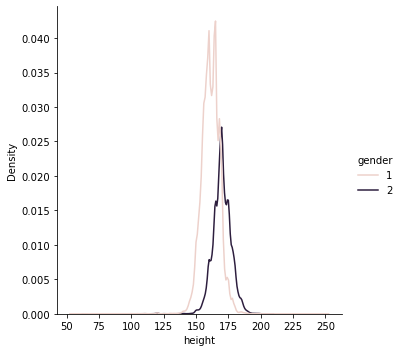

In [ ]:
sns.displot(x='height', hue='gender', kind='kde', data=ds)

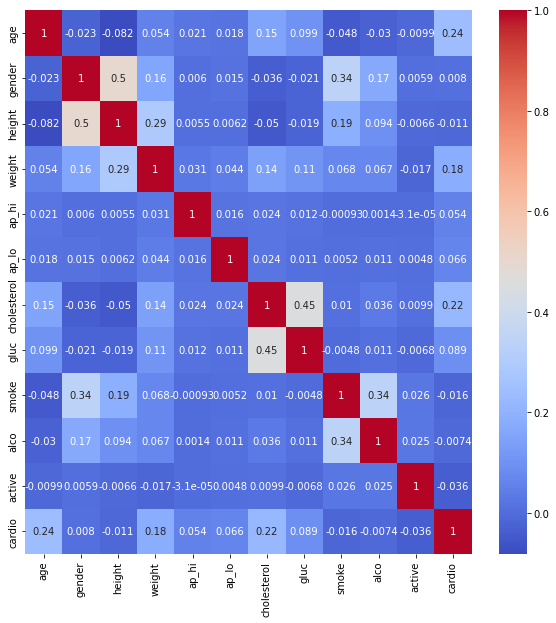

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(ds.corr(), cmap='coolwarm', annot=True)
plt.show()

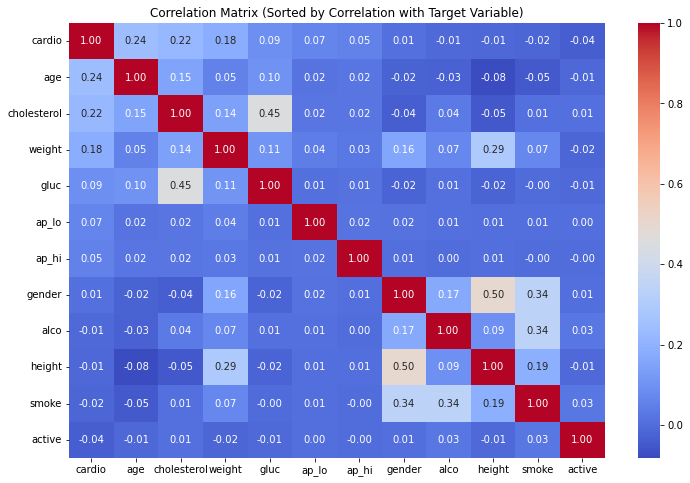

In [ ]:
# Compute the correlation matrix
corr_matrix = ds.corr()

# Sort the columns based on their correlation with the target variable
target_variable = "cardio" # Replace "cardio" with the name of your target variable
sorted_columns = corr_matrix[target_variable].sort_values(ascending=False).index

# Plot the correlation matrix with the columns sorted in horizontal order
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix.loc[sorted_columns, sorted_columns], cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Correlation Matrix (Sorted by Correlation with Target Variable)")
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)

In [ ]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
forest_ypred = forest.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, forest_ypred)
print("Accuracy:", accuracy)

Accuracy: 0.7139897113460989


In [ ]:
#param_dist = {'n_estimators': randint(50,500),
              #'max_depth': randint(1,20)}

# Create a random forest classifier
#rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
#rand_search = RandomizedSearchCV(rf,
                                 #param_distributions = param_dist,
                                 #n_iter=5,
                                 #cv=5)

# Fit the random search object to the data
#rand_search.fit(X_train, y_train)

In [ ]:
# Create a variable for the best model
#best_rf = rand_search.best_estimator_

# Print the best hyperparameters
#print('Best hyperparameters:',  rand_search.best_params_)

In [ ]:
#ypred = rand_search.predict(X_test)

In [ ]:
#accuracy = accuracy_score(y_test, ypred)
#print("Accuracy:", accuracy)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_train_hat = model.predict(X_train)
y_test_hat = model.predict(X_test)

print(model)
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train, y_train_hat))

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_hat))

LogisticRegression()
Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.68      0.73      0.71     28103
           1       0.71      0.66      0.68     27877

    accuracy                           0.70     55980
   macro avg       0.70      0.70      0.69     55980
weighted avg       0.70      0.70      0.69     55980

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.67      0.73      0.70      6901
           1       0.71      0.65      0.68      7095

    accuracy                           0.69     13996
   macro avg       0.69      0.69      0.69     13996
weighted avg       0.69      0.69      0.69     13996



In [ ]:
model = SVC()
model.fit(X_train, y_train)
y_train_hat = model.predict(X_train)
y_test_hat = model.predict(X_test)

print(model)
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train, y_train_hat))

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_hat))

SVC()
Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.60      0.65      0.62     28103
           1       0.61      0.56      0.58     27877

    accuracy                           0.60     55980
   macro avg       0.60      0.60      0.60     55980
weighted avg       0.60      0.60      0.60     55980

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.59      0.66      0.62      6901
           1       0.63      0.56      0.59      7095

    accuracy                           0.61     13996
   macro avg       0.61      0.61      0.61     13996
weighted avg       0.61      0.61      0.61     13996



In [ ]:
model = MLPClassifier()
model.fit(X_train, y_train)
y_train_hat = model.predict(X_train)
y_test_hat = model.predict(X_test)

print(model)
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train, y_train_hat))

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_hat))

MLPClassifier()
Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.69      0.00      0.01     28103
           1       0.50      1.00      0.66     27877

    accuracy                           0.50     55980
   macro avg       0.60      0.50      0.34     55980
weighted avg       0.60      0.50      0.34     55980

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.67      0.00      0.01      6901
           1       0.51      1.00      0.67      7095

    accuracy                           0.51     13996
   macro avg       0.59      0.50      0.34     13996
weighted avg       0.59      0.51      0.35     13996



In [ ]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_train_hat = model.predict(X_train)
y_test_hat = model.predict(X_test)
print(model)
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train, y_train_hat))

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_hat))

KNeighborsClassifier()
Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.77      0.80      0.78     28103
           1       0.79      0.76      0.77     27877

    accuracy                           0.78     55980
   macro avg       0.78      0.78      0.78     55980
weighted avg       0.78      0.78      0.78     55980

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.67      0.71      0.69      6901
           1       0.70      0.66      0.68      7095

    accuracy                           0.69     13996
   macro avg       0.69      0.69      0.69     13996
weighted avg       0.69      0.69      0.69     13996



In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier(random_state=123)
model.fit(X_train, y_train)
y_train_hat = model.predict(X_train)
y_test_hat = model.predict(X_test)

print(model)
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train, y_train_hat))

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_hat))

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=123, ...)
Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.75      0.81      0.78     28103
           1       0.79      0.72      0.76     27877

    accuracy                           0.77   

In [ ]:
X_train.shape

(55980, 11)

In [ ]:
y_train.shape

(55980,)

In [ ]:
import numpy as np

In [ ]:
v = np.arange(100,500,50)
v

array([100, 150, 200, 250, 300, 350, 400, 450])

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
n_estimators: The number of boosting rounds. Range: [100, 1000].

learning_rate: Controls the step size at each boosting iteration. Range: [0.001, 0.3].

max_depth: The maximum depth of a tree. Range: [3, 10].

subsample: The fraction of observations to be randomly sampled for each tree. Range: [0.5, 1.0].

colsample_bytree: The fraction of columns to be randomly sampled for each tree. Range: [0.5, 1.0].

min_child_weight: The minimum sum of weights of all observations required in a child. Range: [1, 10].

gamma: The minimum loss reduction required to make a further partition on a leaf node. Range: [0, 5].

reg_lambda: L2 regularization term on weights. Range: [0, 5].

In [ ]:
n_estimators_range = np.arange(0,500,50)
learning_rate_range = np.arange(0.001,0.02,0.005)
max_depth_range = np.arange(3,10,2)
gamma_range = np.arange(1,10,2)
reg_lambda_range = np.arange(0,5,1)

param_grid = dict(n_estimators = n_estimators_range, learning_rate = learning_rate_range,max_depth = max_depth_range, gamma = gamma_range,reg_lambda = reg_lambda_range )

In [ ]:
md = XGBClassifier(random_state=123)

In [ ]:
param_grid

{'n_estimators': array([  0,  50, 100, 150, 200, 250, 300, 350, 400, 450]),
 'learning_rate': array([0.001, 0.006, 0.011, 0.016]),
 'max_depth': array([3, 5, 7, 9]),
 'gamma': array([1, 3, 5, 7, 9]),
 'reg_lambda': array([0, 1, 2, 3, 4])}

In [ ]:
grid = GridSearchCV(estimator = md, param_grid = param_grid, cv = 5)

In [ ]:
grid.fit(X_train, y_train)

In [ ]:
from lazypredict.Supervised import LazyClassifier

In [ ]:
# Select 500 random samples from class 0
df_0 = ds[ds["cardio"] == 0].sample(500, random_state=42)

# Select 500 random samples from class 1
df_1 = ds[ds["cardio"] == 1].sample(500, random_state=42)

# Concatenate the two dataframes
df_concat = pd.concat([df_0, df_1], axis=0)

# Shuffle the concatenated dataframe
df_concat = df_concat.sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
df_concat

x1 = df_concat.drop('cardio', axis = 1)
y1 = df_concat['cardio']

In [ ]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size = 0.20, random_state = 42)

In [ ]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(x_train1, x_test1, y_train1, y_test1)
models

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:02<00:00,  9.82it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
SGDClassifier,0.77,0.77,0.77,0.76,0.03
LinearSVC,0.74,0.74,0.74,0.74,0.10
LinearDiscriminantAnalysis,0.74,0.74,0.74,0.74,0.06
CalibratedClassifierCV,0.74,0.74,0.74,0.74,0.35
SVC,0.74,0.74,0.74,0.74,0.13
RidgeClassifierCV,0.74,0.74,0.74,0.74,0.02
RidgeClassifier,0.74,0.74,0.74,0.74,0.04
BernoulliNB,0.73,0.74,0.74,0.73,0.03
LogisticRegression,0.73,0.73,0.73,0.73,0.05


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_data = scaler.fit_transform(x1)

In [ ]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x_data, y1, test_size = 0.20, random_state = 42)

In [ ]:
models,predictions = clf.fit(x_train2, x_test2, y_train2, y_test2)
models

'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:02<00:00, 10.57it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
SGDClassifier,0.77,0.77,0.77,0.76,0.04
LinearSVC,0.74,0.74,0.74,0.74,0.10
LinearDiscriminantAnalysis,0.74,0.74,0.74,0.74,0.02
CalibratedClassifierCV,0.74,0.74,0.74,0.74,0.35
SVC,0.74,0.74,0.74,0.74,0.10
RidgeClassifierCV,0.74,0.74,0.74,0.74,0.03
RidgeClassifier,0.74,0.74,0.74,0.74,0.02
BernoulliNB,0.73,0.74,0.74,0.73,0.03
LogisticRegression,0.73,0.73,0.73,0.73,0.03
